In [12]:
# import package
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])

# sklearn classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# encoding
from sklearn.preprocessing import LabelEncoder

In [2]:
# import data
# menggunakan data obesitas dari https://www.kaggle.com/code/mpwolke/obesity-levels-life-style/data?select=ObesityDataSet_raw_and_data_sinthetic.csv
df_obes = pd.read_csv("dataset/obes.csv")
df_obes

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [32]:
# import data secara online
df_obes_2 = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/pytnpkj3/master/dataset/obes.csv")

In [33]:
df_obes_2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [3]:
# kita mau simpan kolom gender, age, height, weight, dan klasifikasi obesitasnya
df_obes.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [4]:
df_obes.drop(columns=['family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'], inplace=True)

In [5]:
df_obes

,Gender,Age,Height,Weight,NObeyesdad
0,Female,21.000000,1.620000,64.000000,Normal_Weight
1,Female,21.000000,1.520000,56.000000,Normal_Weight
2,Male,23.000000,1.800000,77.000000,Normal_Weight
3,Male,27.000000,1.800000,87.000000,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,Overweight_Level_II
...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,Obesity_Type_III


In [6]:
# rename kolom Nobeyesdad jadi "klasifikasi"
df_obes.rename(columns={"NObeyesdad": "klasifikasi"}, inplace=True)

In [7]:
df_obes

,Gender,Age,Height,Weight,klasifikasi
0,Female,21.000000,1.620000,64.000000,Normal_Weight
1,Female,21.000000,1.520000,56.000000,Normal_Weight
2,Male,23.000000,1.800000,77.000000,Normal_Weight
3,Male,27.000000,1.800000,87.000000,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,Overweight_Level_II
...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,Obesity_Type_III


In [8]:
df_obes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       2111 non-null   object 
 1   Age          2111 non-null   float64
 2   Height       2111 non-null   float64
 3   Weight       2111 non-null   float64
 4   klasifikasi  2111 non-null   object 
dtypes: float64(3), object(2)
memory usage: 82.6+ KB


In [9]:
# tipe klasifikasi obesitasnya apa saja?
df_obes["klasifikasi"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: klasifikasi, dtype: int64

In [10]:
# kita bisa gunakan data ini untuk melatih model klasifikasi
# kita bisa masukkan fitur: gender, age, height, weight
# untuk memprediksi tipe klasifikasi obesitas seseorang

In [13]:
# siapin data
# pisahin mana fitur, mana target
# data tipe non-numerik kita encoding dulu

# encoding dulu kolom gender dan klasifikasi
le = LabelEncoder()

df_obes["gender_en"] = le.fit_transform(df_obes["Gender"])
print(le.classes_)

df_obes["class_en"] = le.fit_transform(df_obes["klasifikasi"])
print(le.classes_)

['Female' 'Male']
['Insufficient_Weight' 'Normal_Weight' 'Obesity_Type_I' 'Obesity_Type_II'
 'Obesity_Type_III' 'Overweight_Level_I' 'Overweight_Level_II']


In [14]:
df_obes

,Gender,Age,Height,Weight,klasifikasi,gender_en,class_en
0,Female,21.000000,1.620000,64.000000,Normal_Weight,0,1
1,Female,21.000000,1.520000,56.000000,Normal_Weight,0,1
2,Male,23.000000,1.800000,77.000000,Normal_Weight,1,1
3,Male,27.000000,1.800000,87.000000,Overweight_Level_I,1,5
4,Male,22.000000,1.780000,89.800000,Overweight_Level_II,1,6
...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,Obesity_Type_III,0,4
2107,Female,21.982942,1.748584,133.742943,Obesity_Type_III,0,4
2108,Female,22.524036,1.752206,133.689352,Obesity_Type_III,0,4
2109,Female,24.361936,1.739450,133.346641,Obesity_Type_III,0,4


In [15]:
# pisahin fitur dan target
fitur = df_obes[["gender_en", "Age", "Height", "Weight"]]
target = df_obes["class_en"]

print(fitur, fitur.shape)
print(target, target.shape)

      gender_en        Age    Height      Weight
0             0  21.000000  1.620000   64.000000
1             0  21.000000  1.520000   56.000000
2             1  23.000000  1.800000   77.000000
3             1  27.000000  1.800000   87.000000
4             1  22.000000  1.780000   89.800000
...         ...        ...       ...         ...
2106          0  20.976842  1.710730  131.408528
2107          0  21.982942  1.748584  133.742943
2108          0  22.524036  1.752206  133.689352
2109          0  24.361936  1.739450  133.346641
2110          0  23.664709  1.738836  133.472641

[2111 rows x 4 columns] (2111, 4)
0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: class_en, Length: 2111, dtype: int32 (2111,)


In [18]:
# latih model
model = LogisticRegression(solver="newton-cg")
model.fit(fitur, target)

LogisticRegression(solver='newton-cg')

In [21]:
# pakai model untuk membuat prediksi
# jadi misal ada wanita umur 21 tinggi 150cm berat 60kg masuk klasifikasi apa?
# "gender_en", "Age", "Height", "Weight"
model.predict([[0,21,1.50,60]])

c:\Users\stefa\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
# prediksi model kita adalah seorang wanita umur 21 tinggi 1.5 meter berat 60kg
# ada di class 1 (normal weight)

In [23]:
# evaluasi keakuratan model classifcation menggunakan

print(classification_report(target, model.predict(fitur)))


              precision    recall  f1-score   support

           0       0.83      0.94      0.88       272
           1       0.68      0.62      0.65       287
           2       0.70      0.76      0.73       351
           3       0.86      0.86      0.86       297
           4       1.00      1.00      1.00       324
           5       0.54      0.49      0.51       290
           6       0.54      0.53      0.54       290

    accuracy                           0.75      2111
   macro avg       0.74      0.74      0.74      2111
weighted avg       0.74      0.75      0.74      2111



In [24]:
confusion_matrix(target, model.predict(fitur))

array([[256,  16,   0,   0,   0,   0,   0],
       [ 53, 179,   0,   0,   0,  47,   8],
       [  0,   0, 266,  42,   0,   0,  43],
       [  0,   0,  41, 255,   1,   0,   0],
       [  0,   0,   0,   0, 324,   0,   0],
       [  0,  63,   9,   0,   0, 141,  77],
       [  0,   4,  62,   0,   0,  71, 153]], dtype=int64)

baris adalah data aslinya bilang class apa. baris pertama class 0, baris kedua class 1,...

kolom adalah hasil prediksi model kita bilang apa. kolom pertam prediksi class 0, kolom kedua prediksi class 1, ...

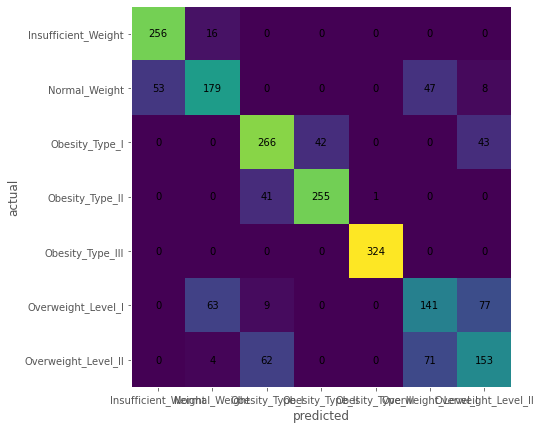

In [30]:
# confusion matrix bisa kita buat lebih enak dilihat secara visual dengan bantuan loop dan mpl
cm = confusion_matrix(target, model.predict(fitur))

fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2, 3, 4, 5, 6), 
    ticklabels=('Insufficient_Weight','Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'))
ax.yaxis.set(ticks=(0, 1, 2, 3, 4, 5, 6), 
    ticklabels=('Insufficient_Weight','Normal_Weight','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III','Overweight_Level_I','Overweight_Level_II'))
ax.set_xlabel("predicted")
ax.set_ylabel("actual")
ax.set_ylim(6.5, -0.5)
for i in range(7):
    for j in range(7):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

In [ ]:
# tuning
# mengubah2 parameter model, atau data, atau lainnya supaya model lebih akurat